In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [33]:
benchmark_df = pd.read_json("benchmark.jsonl", lines=True)
benchmark_df = benchmark_df[["task_id", "approx_token_count"]]
benchmark_df.head()

,task_id,approx_token_count
0,LongBench_HumanEval/100_0_first half,0
1,LongBench_HumanEval/100_0_second half,0
2,LongBench_HumanEval/13_0_first half,0
3,LongBench_HumanEval/13_0_second half,0
4,LongBench_HumanEval/152_0_first half,0


In [34]:
executions_df = pd.read_json("executions_starcoderbase15b.jsonl", lines=True)
executions_df.head()

,task_id,executions
0,LongBench_HumanEval/100_0_first half,"[{'program': ' def make_a_pile(n): """""" ..."
1,LongBench_HumanEval/100_0_second half,"[{'program': ' def make_a_pile(n): """""" ..."
2,LongBench_HumanEval/13_0_first half,[{'program': ' def greatest_common_divisor(a:...
3,LongBench_HumanEval/13_0_second half,[{'program': ' def greatest_common_divisor(a:...
4,LongBench_HumanEval/152_0_first half,"[{'program': ' def compare(game,guess): """"..."


In [35]:
lengths_df = executions_df.copy()
lengths_df["length"] = lengths_df["executions"].apply(lambda es: sum([ len(item["program"]) for item in es ]) / len(es))
lengths_df = lengths_df[["task_id", "length"]]
lengths_df.head()

,task_id,length
0,LongBench_HumanEval/100_0_first half,997.00
1,LongBench_HumanEval/100_0_second half,995.05
2,LongBench_HumanEval/13_0_first half,678.75
3,LongBench_HumanEval/13_0_second half,673.10
4,LongBench_HumanEval/152_0_first half,1643.65


In [36]:
def mutant_catch_rate(execution):
    if execution["exit_code"] != 0:
        return 0
    mutants = execution["mutants"]
    caught_mutants = sum(1 for mutant in mutants if mutant["exit_code"] != 0)
    return caught_mutants / len(mutants)

def mean_mutant_catch_rate(executions):
    n = len(executions)
    if n == 0:
        return 0
    return sum(mutant_catch_rate(execution) for execution in executions) / n


def test_suite_success_rate(executions):
    n = len(executions)
    if n == 0:
        return 0
    return sum(1 for execution in executions if execution["exit_code"] == 0) / n

combined_df = pd.merge(benchmark_df, executions_df, on="task_id")
combined_df["mutant_catch_rate"] = executions_df["executions"].apply(mean_mutant_catch_rate)
combined_df["test_suite_success_rate"] = executions_df["executions"].apply(test_suite_success_rate)
combined_df = combined_df[["task_id", "approx_token_count", "mutant_catch_rate", "test_suite_success_rate"]]
combined_df.head()

,task_id,approx_token_count,mutant_catch_rate,test_suite_success_rate
0,LongBench_HumanEval/100_0_first half,0,0.0000,0.00
1,LongBench_HumanEval/100_0_second half,0,0.0000,0.00
2,LongBench_HumanEval/13_0_first half,0,0.7375,0.85
3,LongBench_HumanEval/13_0_second half,0,0.7250,0.80
4,LongBench_HumanEval/152_0_first half,0,0.8000,0.80


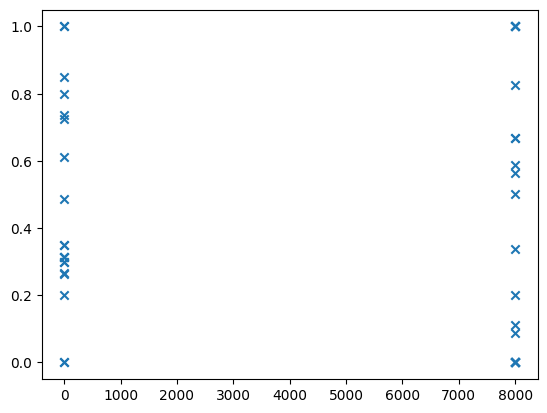

In [37]:
# Plot size on X and pass1 on Y but as a CDF
plt.scatter(combined_df["approx_token_count"], combined_df["mutant_catch_rate"], marker = "x")

In [38]:
combined_df["mutant_catch_rate"].describe()

count    40.000000
mean      0.443125
std       0.348761
min       0.000000
25%       0.178125
50%       0.343750
75%       0.728125
max       1.000000
Name: mutant_catch_rate, dtype: float64

In [39]:
combined_df["test_suite_success_rate"].describe()

count    40.00000
mean      0.54125
std       0.37174
min       0.00000
25%       0.30000
50%       0.50000
75%       0.86250
max       1.00000
Name: test_suite_success_rate, dtype: float64

In [40]:
combined_df[combined_df["approx_token_count"] > 0]["mutant_catch_rate"].describe()

count    20.000000
mean      0.427292
std       0.397607
min       0.000000
25%       0.000000
50%       0.418750
75%       0.706250
max       1.000000
Name: mutant_catch_rate, dtype: float64

In [41]:
combined_df[combined_df["approx_token_count"] == 0]["mutant_catch_rate"].describe()

count    20.000000
mean      0.458958
std       0.301747
min       0.000000
25%       0.291667
50%       0.331250
75%       0.728125
max       1.000000
Name: mutant_catch_rate, dtype: float64

In [40]:
executions_df[executions_df["task_id"] == "LongBench_HumanEval/100_8000_first half"]

,task_id,executions
20,LongBench_HumanEval/100_8000_first half,"[{'program': ' def make_a_pile(n): """""" ..."


In [43]:
benchmark_df = pd.read_json("benchmark.jsonl", lines=True)
benchmark_df = benchmark_df[benchmark_df["humaneval_task_id"] == "HumanEval/100"]

In [29]:
completions_df = pd.read_json("completions_starcoderbase15b.jsonl", lines=True)
completions_df["len"] = completions_df["completions"].apply(lambda completions: sum(map(len, completions)) / len(completions))
completions_df = completions_df[["approx_token_count", "len"]]


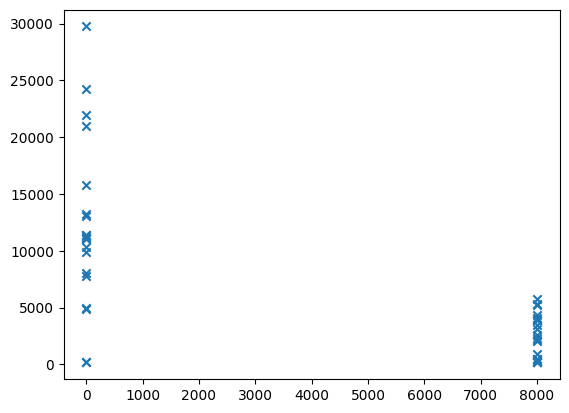

In [30]:
plt.scatter(completions_df["approx_token_count"], completions_df["len"], marker = "x")